<a href="https://colab.research.google.com/github/GustavoSchroeder/Analise-sentimento-filmes-exemplo-keras/blob/main/Analise_sentimento_filmes_exemplo_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo de aplicação de aprendizagem profunda em análise de sentimento com Keras
Adaptado do livro do Chollet (Cap. 3.5: Deep Learning with Python).

O software aprende a classificar um comentário sobre um filme como positivo ou negativo.

In [1]:
import keras
import numpy as np

keras.__version__
print(np.__version__)

1.19.5


# Aqui utilizamos um conjunto de dados do IMDB  - https://www.imdb.com/
O IMDB é um conjunto de dados público com comentários classificados entre positivos ou negativos. 

Os comentários são separados em 25.000 para treinamento e 25.000 para teste. É um conjunto de dados balanceado (50% de comentários positivos e 50% de negativos). Os comandos abaixo carregam o conjunto de dados IMDB.

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

`num_words=10000` significa que apenas as 10.000 palavras mais frequentes dos comentários serão utilizadas no treinamento. Palavras mais raras serão descartadas.

As variáveis `train_data` and `test_data` são listas de comentários e cada comentário é uma lista de "índices" para palavras

**Por que o Train Data retorna índices? **
Cada número corresponde a uma palavra diferente, mas o mesmo tem que ser buscado em uma estrutura de dicionário


As variáveis `train_labels` and `test_labels` são listas de 0 e 1, onde 0 significa um comentário **"negativo"** e 1 significa um comentário **"positivo"**

O comando abaixo mostra um único comentário e depois a sua classificação (como positivo, 1)

In [9]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [10]:
train_labels[0]

1

*Os* comandos abaixo mostram a primeira sentença com as palavras ao invés de números:

In [11]:
# word_index é o dicionário que mapeia cada palavra em um número 
word_index = imdb.get_word_index()
# Aqui nós invertemos o mapeamento pois queremos mapear os números em palavras
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Abaixo uma sequência é decodificada usando o dicionários. O i-3 é porque os 3 primeiros índices são reservados.
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [ ]:
decoded_review

"? the ? ? at storytelling the traditional sort many years after the event i can still see in my ? eye an elderly lady my friend's mother retelling the battle of ? she makes the characters come alive her passion is that of an eye witness one to the events on the ? heath a mile or so from where she lives br br of course it happened many years before she was born but you wouldn't guess from the way she tells it the same story is told in bars the length and ? of scotland as i discussed it with a friend one night in ? a local cut in to give his version the discussion continued to closing time br br stories passed down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our invisible world and as we grow older they maybe still serve as inspiration or as an emotional ? fact and fiction blend with ? role models warning stories ? magic and mystery br br my name is ? like my grandfather and his grandfather before him our prot

# Preparação dos Dados

Para usar as redes neurais profundas no Keras é preciso alterar o formato da entrada (**precisa ser um tensor e não uma lista**). 

Neste exemplo é usado um método bem simples mas existem outras formas mais eficientes (E.g.: word embeddings). 

No método simples, para cada comentário, é criado um vetor (que é um tipo de tensor) com 10.000 posições em que cada posição conterá 1 ou 0 para indicar se aquela palavra está ou não presente no comentário.

In [13]:
def vectorize_sequences(sequences, dimension=10000):
    # Cria uma matriz zerada para todos os vetores que serão associados a cada comentário
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Exemplo de como um comentário é representado agora 

(note que se perde informação sobre a sequência e agora sabemos apenas se uma determinada palavra está ou não presente no comentário)

In [14]:
x_train[3]

array([0., 1., 1., ..., 0., 0., 0.])

As listas com as classificações também precisam ser transformadas em vetores/tensores

In [15]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Construindo a rede neural profunda

Vamos agora iniciar a criação de uma rede com arquitetura de 3 camadas (além da camada de entrada), todas completamente conectadas (Dense) e com a função de ativação "Relu" para as camadas ocultas e "sigmoid" para a camada de saída.

** ReLU é a função de ativação mais amplamente utilizada ao projetar redes neurais atualmente. Primeiramente, a função ReLU é não linear, o que significa que podemos facilmente copiar os erros para trás e ter várias camadas de neurônios ativados pela função ReLU.

A principal vantagem de usar a função ReLU sobre outras funções de ativação é que ela não ativa todos os neurônios ao mesmo tempo.

In [16]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Por fim, a rede é criada usando como função de **perda a entropia cruzada binária** (`binary_crossentropy`) e técnica de otimização baseada na **propagação da raiz do erro quadrático médio** (`rmsprop`) com taxa de aprendizagem (lr) de 0.001. 

A métrica acurácia (`accuracy`) é usada na validação do modelo.



In [17]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Aprendendo e monitorando o aprendizado usando um conjunto de validação

Um conjunto de validação contendo 10.000 dos 25.000 exemplos de treinamento é criado abaixo.

In [18]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Abaixo ocorre o treinamento da rede usando 20 épocas e tamanho do lote igual a 512.

In [19]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 55ms/step - loss: 0.5819 - accuracy: 0.6874 - val_loss: 0.3627 - val_accuracy: 0.8693
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2931 - accuracy: 0.9075 - val_loss: 0.3085 - val_accuracy: 0.8789
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2092 - accuracy: 0.9376 - val_loss: 0.3153 - val_accuracy: 0.8702
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1653 - accuracy: 0.9470 - val_loss: 0.2770 - val_accuracy: 0.8896
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1313 - accuracy: 0.9597 - val_loss: 0.3078 - val_accuracy: 0.8812
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1060 - accuracy: 0.9708 - val_loss: 0.3163 - val_accuracy: 0.8812
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0839 - accuracy: 0.9780 - val_loss: 0.3200 - val_accuracy: 0.8830
Epoch 8/20
30

A variável "history" irá conter informações úteis para analisar o treinamento

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

O código abaixo mostra informações gráficas sobre como a perda (da função de perda) e a acurácia variaram entre as épocas para o conjunto de treinamento e de validação.

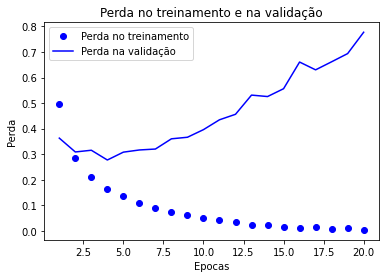

In [25]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" é para linha pontilhada em azul ("blue dot")
plt.plot(epochs, loss, 'bo', label='Perda no treinamento')
# "b" é para linha solida em azul 
plt.plot(epochs, val_loss, 'b', label='Perda na validação')
plt.title('Perda no treinamento e na validação')
plt.xlabel('Epocas')
plt.ylabel('Perda')
plt.legend()

plt.show()

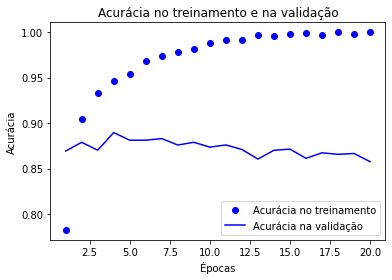

In [27]:
plt.clf()  
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Acurácia no treinamento')
plt.plot(epochs, val_acc, 'b', label='Acurácia na validação')
plt.title('Acurácia no treinamento e na validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.show()

# Usando a rede treinada para classificar o conjunto de teste

Quanto mais próximo de 1 o valor, maior a "confiança" de que seja um comentário positivo, quanto mais próximo de 0, maior a "confiança" em um resultado negativo.

In [29]:
predito = model.predict(x_test)
print(predito)

# Real
print(y_test)

[[0.00289968]
 [1.        ]
 [0.6079294 ]
 ...
 [0.0011206 ]
 [0.00732797]
 [0.79822683]]
[0. 1. 1. ... 0. 0. 0.]
